In [1]:
# gradient_shap.ipynb
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

# Transformer-based Harsanyi (ViT SHAP)

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from models.harsanyi import HarsanyiViT, train_harsanyi_vit
from harsanyi_utils.harsanyi_shap_utils import compute_shap_from_harsanyi_vit, visualize_harsanyi_shap
from data.data import get_imagenette_dataloader
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
harsanyi_vit_model = HarsanyiViT(model_name='vit_base_patch16_224', pretrained=True, num_classes=10).to(device)

In [4]:
dataloader = get_imagenette_dataloader(batch_size=32, img_size=224)
images, labels = next(iter(dataloader))

Imagenette already exists, skipping download.


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
harsanyi_vit_model = harsanyi_vit_model.to(device)

train_harsanyi_vit(harsanyi_vit_model, dataloader)

Epoch [1/20], Loss: 14.7265, LR: 0.000248
Epoch [2/20], Loss: 2.6114, LR: 0.000244
Epoch [3/20], Loss: 1.0912, LR: 0.000236
Epoch [4/20], Loss: 0.8743, LR: 0.000226
Epoch [5/20], Loss: 0.7080, LR: 0.000213
Epoch [6/20], Loss: 0.6618, LR: 0.000198
Epoch [7/20], Loss: 0.6351, LR: 0.000182
Epoch [8/20], Loss: 0.6210, LR: 0.000164
Epoch [9/20], Loss: 0.6039, LR: 0.000145
Epoch [10/20], Loss: 0.6025, LR: 0.000125
Epoch [11/20], Loss: 0.6023, LR: 0.000105
Epoch [12/20], Loss: 0.6023, LR: 0.000086
Epoch [13/20], Loss: 0.6023, LR: 0.000068
Epoch [14/20], Loss: 0.6023, LR: 0.000052
Epoch [15/20], Loss: 0.6023, LR: 0.000037
Epoch [16/20], Loss: 0.6023, LR: 0.000024
Epoch [17/20], Loss: 0.6023, LR: 0.000014
Epoch [18/20], Loss: 0.6023, LR: 0.000006
Epoch [19/20], Loss: 0.6023, LR: 0.000002
Epoch [20/20], Loss: 0.6023, LR: 0.000000


In [6]:
shap_values = compute_shap_from_harsanyi_vit(harsanyi_vit_model, images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shap_values shape: torch.Size([196])
SHAP value range before normalization: min=0.41797420382499695, max=106.31304931640625
Normalized SHAP value range: min=0.0, max=1.0


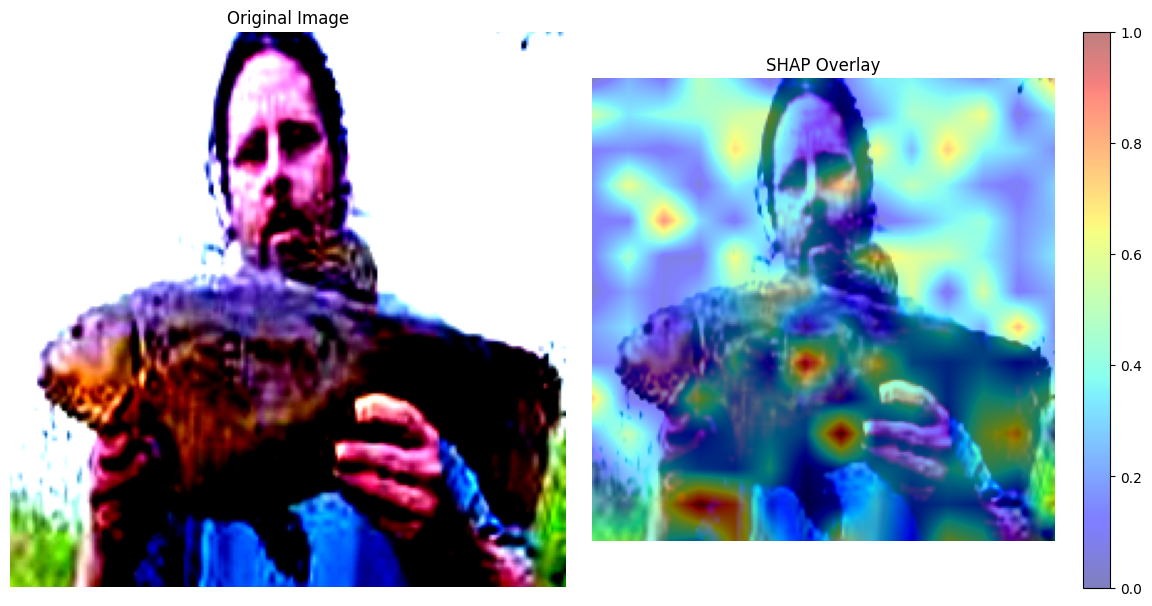

In [7]:
visualize_harsanyi_shap(shap_values[0], images[0].cpu().permute(1, 2, 0).numpy())